Aufgabe 27.
Analysieren Sie den Datensatz tips.csv, der Informationen zu Restaurantbesuchen
enthält. Untersuchen Sie insbesondere den Zusammenhang zwischen der Höhe der Gesamtrechnung (total_bill) und dem Trinkgeld (tip).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [3]:
df = pd.read_csv('../data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


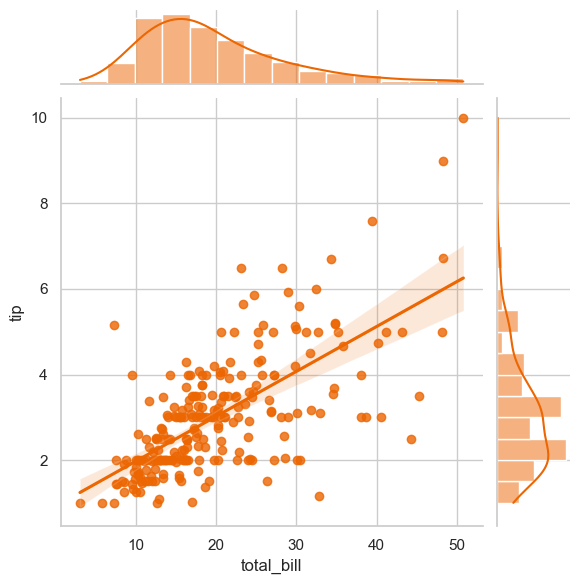

In [4]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg');

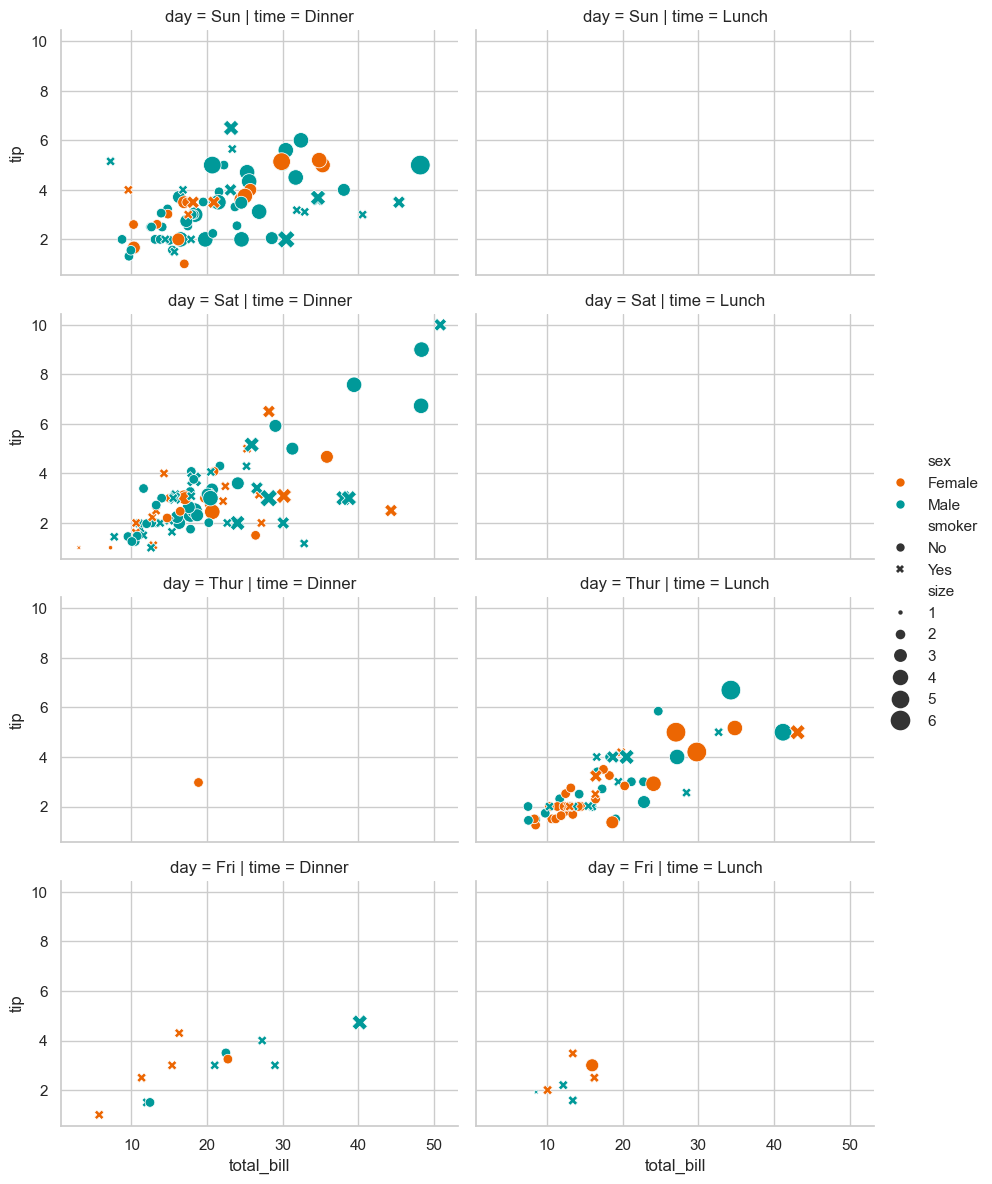

In [5]:
sns.relplot(
    x='total_bill',
    y='tip',
    data=df,
    hue='sex',
    col='time',
    row='day',
    height=3,
    aspect=1.5,
    size='size',
    sizes=(10, 200),
    style='smoker'
);

In [6]:
df['size'] = pd.Categorical(df['size'], categories=[1, 2, 3, 4, 5, 6], ordered=True)
df['size'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=True)

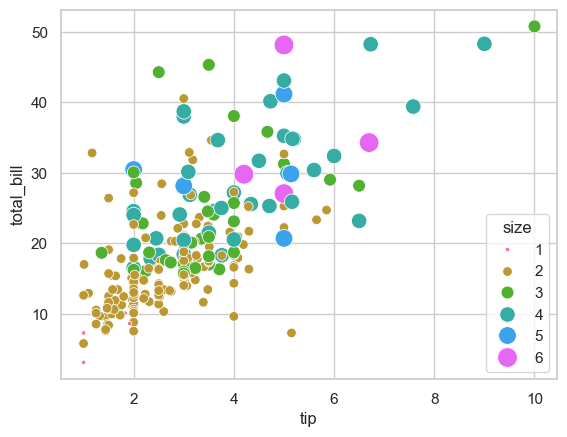

In [7]:
sns.scatterplot(x='tip', y='total_bill', hue='size', data=df, sizes=(10, 200), size='size', size_order=[6, 5, 4, 3, 2, 1]);

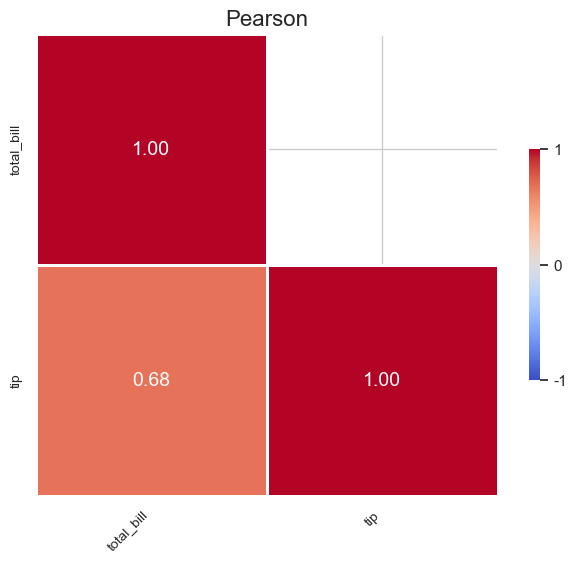

In [8]:
from utils import *
num_corr_heatmap(df.corr(numeric_only=True))

a) Führen Sie eine einfache lineare Regression durch und geben Sie die geschätzte
Regressionsgleichung an.

In [9]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
X = df.total_bill
X = add_constant(X)
y = df.tip
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           6.69e-34
Time:                        14:56:11   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

Regressionsgleichung:
$$\hat{y}=0.9203 + 0.1050x$$

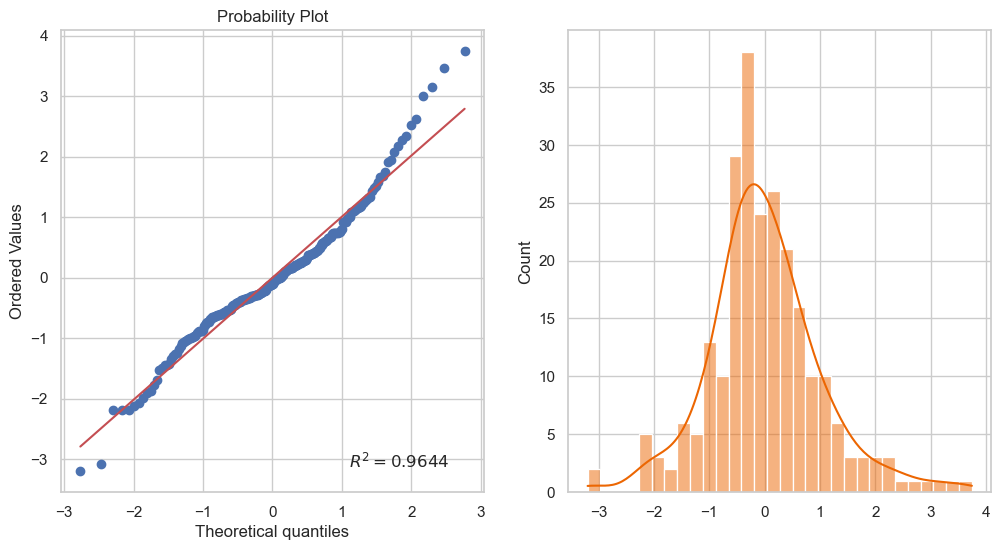

Shapiro-Wilk normality test: p-value = 2.171379854243677e-05
D'Agostino's K^2 normality test: p-value = 4.139083947261571e-05
Kolmogorov-Smirnov normality test: p-value = 0.11139111485569242
Anderson-Darling normality test: statistic = 2.4067908866601897, critical value = 0.775


In [10]:
check_normality(results.resid)

b) Analysieren Sie die statistische Signifikanz der Steigung und bestimmen Sie das 95%-Konfidenzintervall.

Die beide Koeffizienten sind statisch signifikant mit den folgenden Konfidenzintervalen:

    > b0: [0.606 1.235]

    > b1: [0.091 0.120]

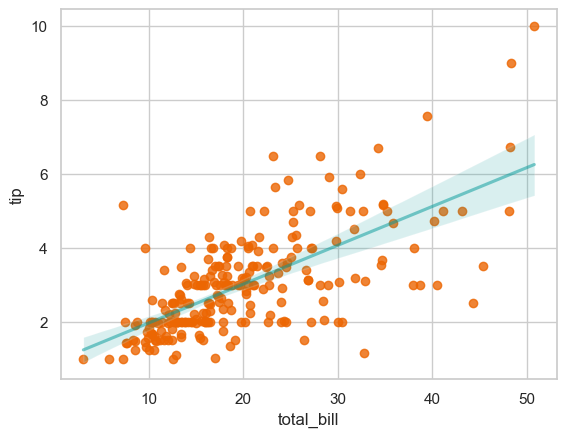

In [11]:
sns.regplot(x='total_bill', y='tip', data=df, line_kws={'color': siemens_petrol, 'alpha': 0.5});

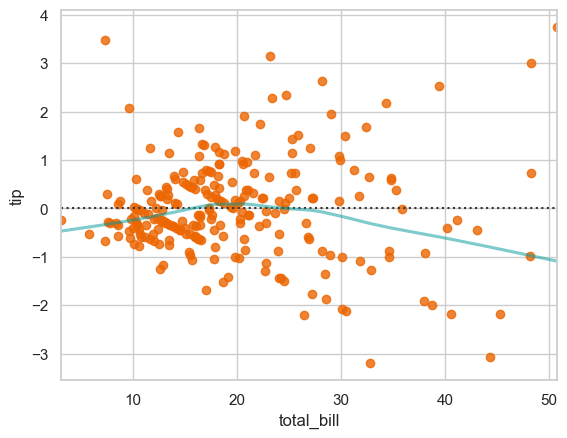

count    2.440000e+02
mean     4.368091e-16
std      1.019943e+00
min     -3.198225e+00
25%     -5.651615e-01
50%     -9.744499e-02
75%      4.863111e-01
max      3.743435e+00
dtype: float64

In [12]:
sns.residplot(x='total_bill', y='tip', data=df, lowess=True, line_kws={'color': siemens_petrol, 'alpha': 0.5});
plt.show()
results.resid.describe()

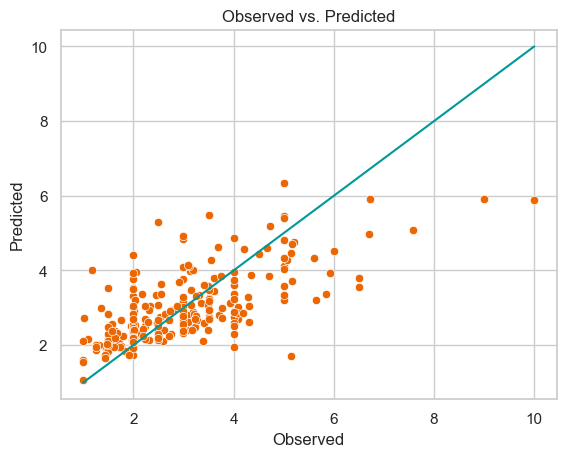

In [28]:
sns.scatterplot(x='tip', y=results.predict(X), data=df);
sns.lineplot(x='tip', y='tip', data=df, color=siemens_petrol);
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted');
plt.show()

c) Interpretieren Sie Ihre Ergebnisse im Kontext. Welche Aussagekraft hat das Modell? Was sagt das Konfidenzband aus?

Unser Modell mit dem signifikanten Koeffizient b1 zeigt, es gibt bestimmt eine Zusammenhang gibt zwischen `total_bill` und `tip` und positiv Zeichen zeigt, diese Zusammen ist positiv. R2 von 0.457 sagt 45,7% der Streung kann durch lineares Regressionsmodell erklärt werden was auch ganz gut ist. Nur dass wir sehr höhe Wölbung von 4.711 haben was signifikant von 0 abweicht und deutet darauf hin, dass unsere Residuen nicht wirklich normalverteilt sind, auch die Normalverteilungstests sind signifikant. D.h. wir sollen lieber hier keine lineare Regression verwenden, sondern ein anderes Modell, was nicht normalverteilung vorausgesetzt. Es ist auch durchaus Möglich dass wir mit anderen Features wie Geschlecht und Familiengröße noch bessere Ergebnisse erziehen können. Außerdem das Konfidenzband zeigt, wo liegen die Werte mit 95% Wahrscheinlichkeit um die Gerade herum, was normalverteilt ist, weil wir immer "Noise" haben, weswegen unsere Datenpunkte liegen fast nie (sehr selten) genau an der Gerade.